### DATASETS

In [ ]:
# [datasets]  https://data.mendeley.com/datasets/jxwvdwhpc2/1


## EDA DEL DATASETS

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## VISUALIZACION TIPOS DE CÁNCER

### Representación de una imagen por clase

In [ ]:
# import os
# import random

# # Carpeta principal donde están las imágenes
# base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"

# # Rutas de imágenes y sus etiquetas
# image_paths = []
# labels = []

# # Clases (nombres de carpetas)
# clases = set()

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue  # Si no es carpeta, la saltamos

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if os.path.isdir(ruta_clase):
#             clases.add(nombre_clase)

# clases = sorted(list(clases))
# print("Clases encontradas:", clases)

# # Creamos un número para cada clase
# class_map = {nombre: i for i, nombre in enumerate(clases)}

# # Guardar las imágenes de cada clase
# imagenes_por_clase = {}

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if not os.path.isdir(ruta_clase):
#             continue

#         # Lista de imágenes de esta clase
#         imagenes = [
#             os.path.join(ruta_clase, img)
#             for img in os.listdir(ruta_clase)
#             if img.lower().endswith((".jpg", ".jpeg", ".png"))
#         ]

#         if nombre_clase not in imagenes_por_clase:
#             imagenes_por_clase[nombre_clase] = []

#         imagenes_por_clase[nombre_clase].extend(imagenes)

# # Mostrar cuántas imágenes tiene cada clase
# for clase, lista in imagenes_por_clase.items():
#     print(f"Clase '{clase}': {len(lista)} imágenes")

# # Encontrar la clase con menos imágenes (para balancear)
# minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
# print(f"\nNúmero mínimo de imágenes por clase: {minimo_imagenes}")

# # Seleccionar aleatoriamente el mismo número de imágenes de cada clase
# for clase, lista in imagenes_por_clase.items():
#     seleccionadas = random.sample(lista, minimo_imagenes)
#     # seleccionadas = random.sample(lista, 100)
#     image_paths.extend(seleccionadas)
#     labels.extend([class_map[clase]] * minimo_imagenes)
#     # labels.extend([class_map[clase]] * 100)

# # Verificación final
# print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
# print(f"Total de etiquetas: {len(labels)}")

# for clase, idx in class_map.items():
#     cantidad = labels.count(idx)
#     print(f"Clase '{clase}': {cantidad} imágenes")


Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
Clase 'tubular_adenoma': 569 imágenes
Clase 'phyllodes_tumor': 453 imágenes
Clase 'ductal_carcinoma': 3460 imágenes
Clase 'lobular_carcinoma': 626 imágenes
Clase 'fibroadenoma': 1014 imágenes
Clase 'mucinous_carcinoma': 792 imágenes
Clase 'adenosis': 444 imágenes
Clase 'papillary_carcinoma': 560 imágenes

Número mínimo de imágenes por clase: 444

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


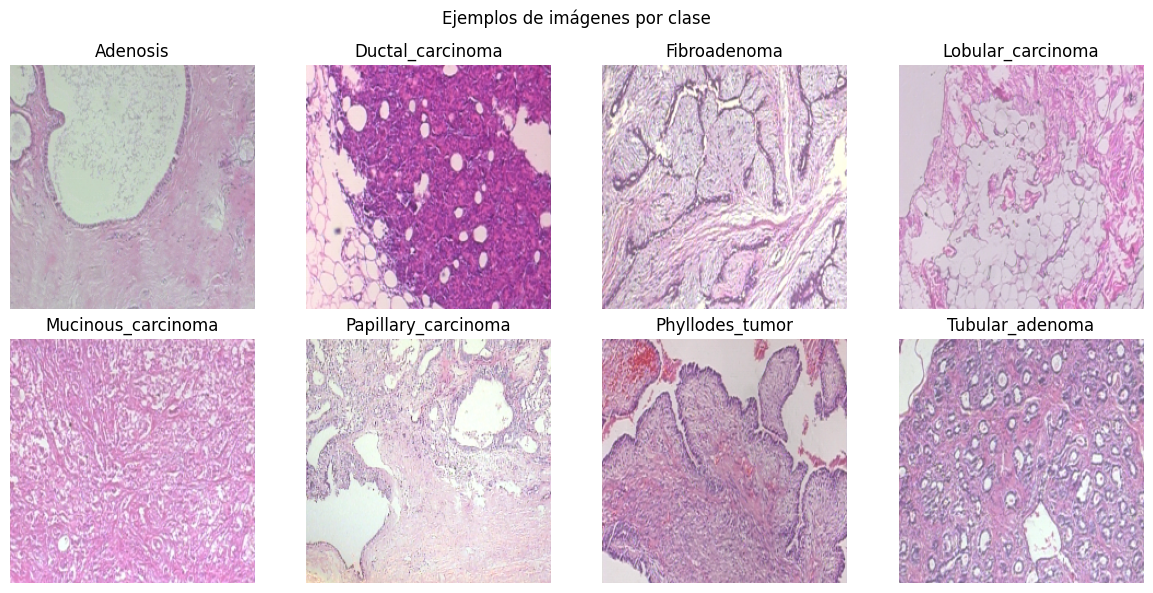

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# # Número de clases
# num_class = len(class_map)
# n_cols = 4
# n_rows = (num_class + n_cols - 1) // n_cols

# plt.figure(figsize=(n_cols * 3, n_rows * 3))

# # Recorrer cada clase por nombre
# for idx, class_name in enumerate(class_map.keys()):
#     class_path = None
#     for group in os.listdir(base_path):
#         group_path = os.path.join(base_path, group)
#         potential_path = os.path.join(group_path, class_name)
#         if os.path.isdir(potential_path):
#             class_path = potential_path
#             break

#     if class_path is None:
#         print(f"No se encontró carpeta para clase {class_name}")
#         continue

#     # Listar imágenes en esa carpeta
#     images = [
#         img for img in os.listdir(class_path)
#         if img.lower().endswith(('.jpg', '.jpeg', '.png'))
#     ]

#     if not images:
#         print(f"No hay imágenes en: {class_path}")
#         continue

#     # Imagen aleatoria
#     imagen_random = random.choice(images)
#     imagen_path = os.path.join(class_path, imagen_random)
#     # print(imagen_path)
#     imagen = Image.open(imagen_path)

#     plt.subplot(n_rows, n_cols, idx + 1)
#     plt.imshow(imagen)
#     plt.title(class_name.capitalize())
#     plt.axis('off')

# plt.suptitle("Ejemplos de imágenes por clase")
# plt.tight_layout()
# plt.show()


## MODELOS CNN

In [2]:
import os
import random
import torch

# ==============================
#  Configuración
# ==============================
base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==============================
# Crear lista de imágenes y etiquetas
# ==============================
image_paths = []
labels = []
clases = set()

for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if os.path.isdir(ruta_clase):
            clases.add(nombre_clase)

clases = sorted(list(clases))
print("Clases encontradas:", clases)
class_map = {nombre: i for i, nombre in enumerate(clases)}

# Guardar imágenes por clase
imagenes_por_clase = {}
for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if not os.path.isdir(ruta_clase):
            continue
        imagenes = [
            os.path.join(ruta_clase, img)
            for img in os.listdir(ruta_clase)
            if img.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        if nombre_clase not in imagenes_por_clase:
            imagenes_por_clase[nombre_clase] = []
        imagenes_por_clase[nombre_clase].extend(imagenes)

# Balancear dataset
minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
for clase, lista in imagenes_por_clase.items():
    seleccionadas = random.sample(lista, minimo_imagenes)
    image_paths.extend(seleccionadas)
    labels.extend([class_map[clase]] * minimo_imagenes)

# Verificación final
print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
print(f"Total de etiquetas: {len(labels)}")

for clase, idx in class_map.items():
    cantidad = labels.count(idx)
    print(f"Clase '{clase}': {cantidad} imágenes")

Usando dispositivo: cuda
Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


In [3]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torchvision.transforms as transforms
import torch
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# ==============================
# Codificar etiquetas y split train/test
# ==============================
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42
)
num_classes = len(le.classes_)
print(f"Número de clases: {num_classes}")

# ==============================
# Transformaciones
# ==============================
train_transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


# Cargar y transformar imágenes para train
train_images = []
train_images_ntf = []
for path in tqdm(train_image_paths):
    img = Image.open(path).convert("RGB")
    img = train_transform(img)
    train_images.append(img)

# Cargar y transformar imágenes para test
test_images = []
test_images_ntf = []
for path in tqdm(test_image_paths):
    img = Image.open(path).convert("RGB")
    img = test_transform(img)
    test_images.append(img)


Número de clases: 8


100%|██████████| 711/711 [06:50<00:00,  1.73it/s]


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==================================
# Convertir listas a tensores
# ==================================
# --------------------- CON Transformaciones  ------------------------
X_train_tensor = torch.stack(train_images)
y_train_tensor = torch.tensor(train_labels, dtype=torch.long)

X_test_tensor = torch.stack(test_images)
y_test_tensor = torch.tensor(test_labels, dtype=torch.long)

# ==================================
# Crear datasets y dataloaders
# ==================================
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader_16 = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
test_loader_16 = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

train_loader_32 = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader_32 = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

Usando dispositivo: cuda


## MODEL DenseNet121

### PRUEBA 1a: Dataloader, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 108MB/s] 


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.4116, Test Loss=0.8464, Test Acc=0.6850


Epoch 2: Train Loss=0.6311, Test Loss=0.5925, Test Acc=0.7707


Epoch 3: Train Loss=0.3197, Test Loss=0.5103, Test Acc=0.8158


Epoch 4: Train Loss=0.1716, Test Loss=0.4510, Test Acc=0.8509


Epoch 5: Train Loss=0.1009, Test Loss=0.4420, Test Acc=0.8481


Epoch 6: Train Loss=0.0616, Test Loss=0.4716, Test Acc=0.8397


Epoch 7: Train Loss=0.0443, Test Loss=0.4539, Test Acc=0.8509


Epoch 8: Train Loss=0.0394, Test Loss=0.4424, Test Acc=0.8565
🛑 Early stopping en epoch 8


<All keys matched successfully>

In [ ]:
# Prueba 1
true_labels_densenet_1a = true_labels_list
pred_labels_densenet_1a = pred_labels_list
prob_densenet_1a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_1a = accuracy_score(true_labels_densenet_1a, pred_labels_densenet_1a)
error_rate_densenet_1a = 1 - acc_densenet_1a
print(f"Accuracy total: {acc_densenet_1a:.4f}, Error rate: {error_rate_densenet_1a:.4f}\n")

print(classification_report(
    true_labels_densenet_1a,
    pred_labels_densenet_1a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8565, Error rate: 0.1435

                     precision    recall  f1-score   support

           adenosis       0.96      0.96      0.96        89
   ductal_carcinoma       0.76      0.76      0.76        88
       fibroadenoma       0.81      0.81      0.81        89
  lobular_carcinoma       0.80      0.87      0.83        89
 mucinous_carcinoma       0.87      0.83      0.85        89
papillary_carcinoma       0.92      0.88      0.90        89
    phyllodes_tumor       0.82      0.81      0.81        89
    tubular_adenoma       0.92      0.94      0.93        89

           accuracy                           0.86       711
          macro avg       0.86      0.86      0.86       711
       weighted avg       0.86      0.86      0.86       711



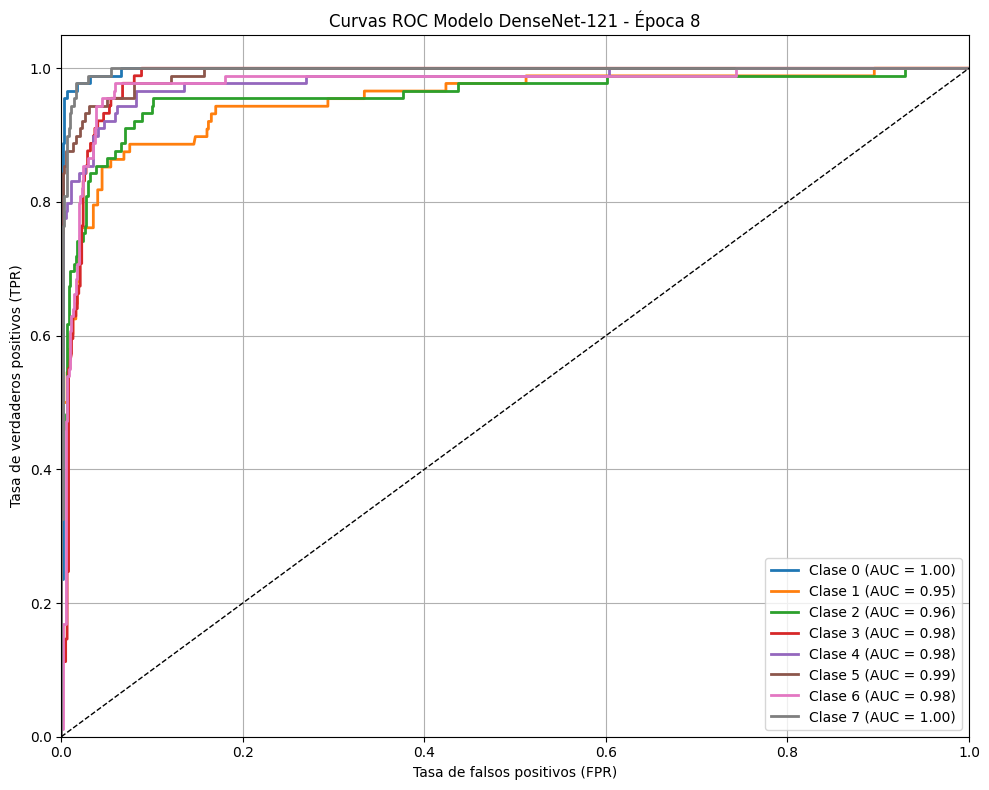

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_1a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_1a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


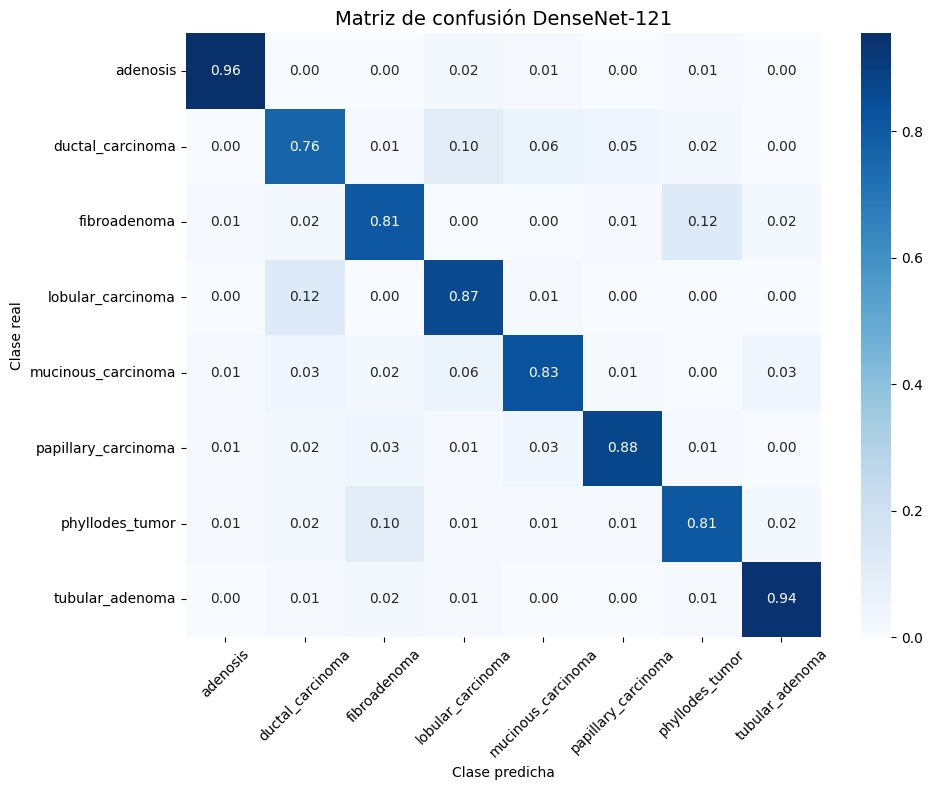

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_1a, pred_labels_densenet_1a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 1b: Dataloader, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Se optimizan todas las capas
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.3508, Test Loss=0.8060, Test Acc=0.7201


Epoch 2: Train Loss=0.6533, Test Loss=0.5815, Test Acc=0.7918


Epoch 3: Train Loss=0.3947, Test Loss=0.5398, Test Acc=0.8101


Epoch 4: Train Loss=0.2567, Test Loss=0.4566, Test Acc=0.8467


Epoch 5: Train Loss=0.1624, Test Loss=0.5128, Test Acc=0.8425


Epoch 6: Train Loss=0.1236, Test Loss=0.5498, Test Acc=0.8256


Epoch 7: Train Loss=0.0833, Test Loss=0.5999, Test Acc=0.8340
🛑 Early stopping en epoch 7


<All keys matched successfully>

In [ ]:
# Prueba 1
true_labels_densenet_1b = true_labels_list
pred_labels_densenet_1b = pred_labels_list
prob_densenet_1b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_1b = accuracy_score(true_labels_densenet_1b, pred_labels_densenet_1b)
error_rate_densenet_1b = 1 - acc_densenet_1b
print(f"Accuracy total: {acc_densenet_1b:.4f}, Error rate: {error_rate_densenet_1b:.4f}\n")

print(classification_report(
    true_labels_densenet_1b,
    pred_labels_densenet_1b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8340, Error rate: 0.1660

                     precision    recall  f1-score   support

           adenosis       0.97      0.88      0.92        89
   ductal_carcinoma       0.92      0.64      0.75        88
       fibroadenoma       0.73      0.76      0.75        89
  lobular_carcinoma       0.73      0.98      0.84        89
 mucinous_carcinoma       0.78      0.84      0.81        89
papillary_carcinoma       0.96      0.83      0.89        89
    phyllodes_tumor       0.76      0.80      0.78        89
    tubular_adenoma       0.92      0.94      0.93        89

           accuracy                           0.83       711
          macro avg       0.85      0.83      0.83       711
       weighted avg       0.85      0.83      0.83       711



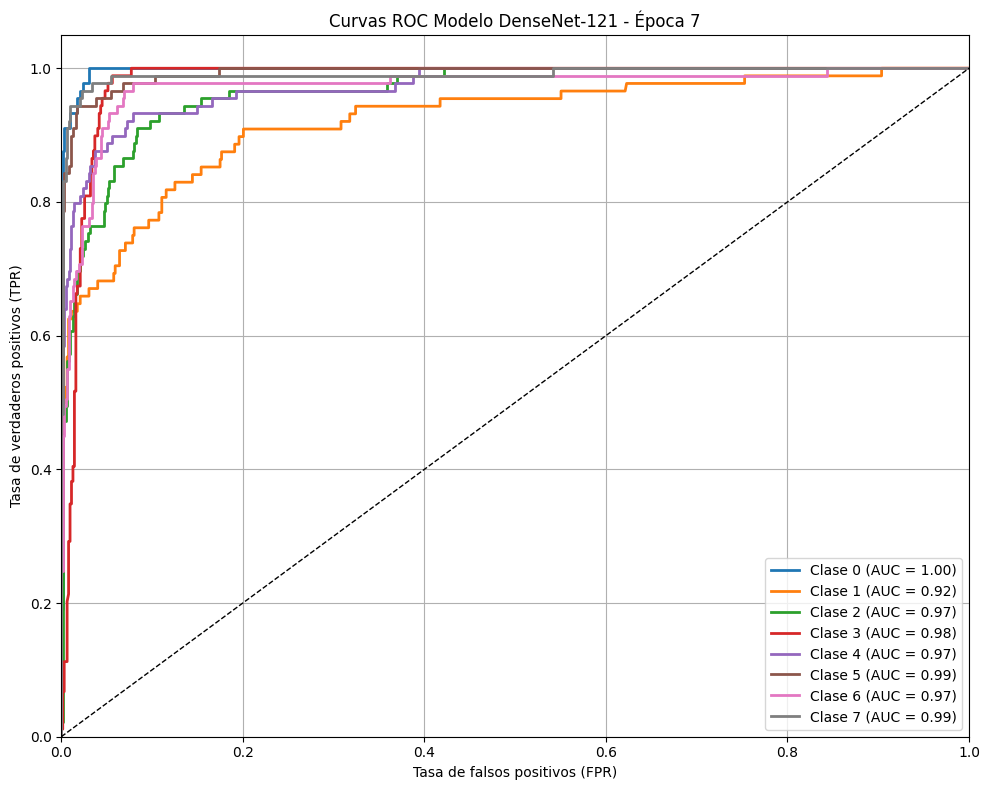

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_1b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_1b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


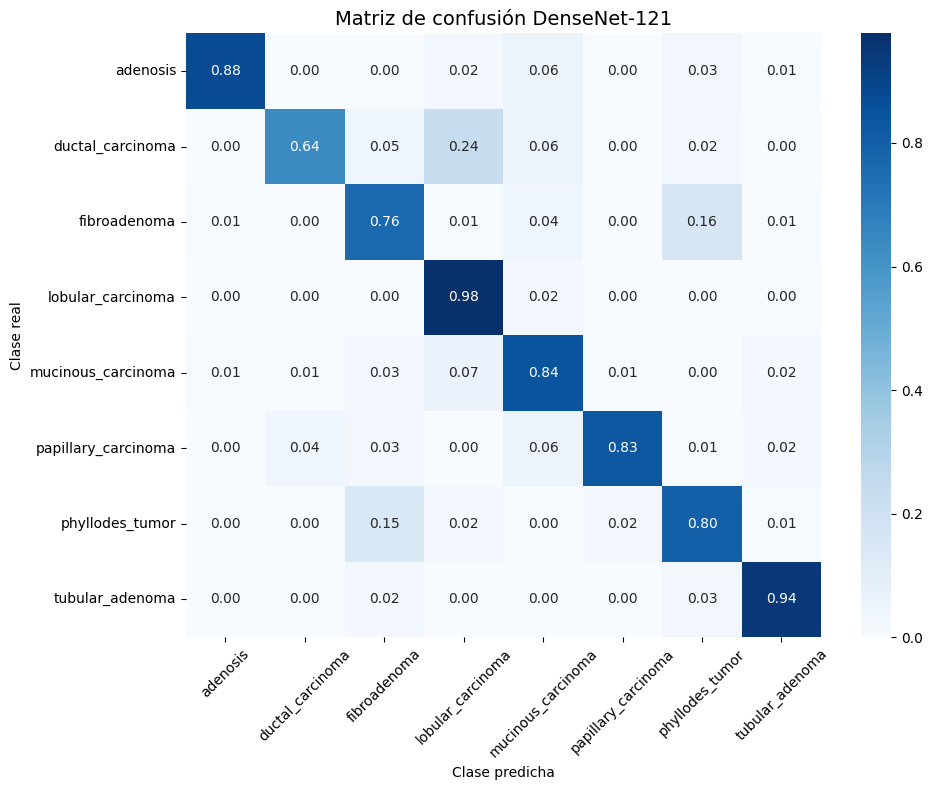

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_1b, pred_labels_densenet_1b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 2a: Dataloader, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Solo se optimiza la capa final
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0753, Test Loss=2.0113, Test Acc=0.2039


Epoch 2: Train Loss=1.9639, Test Loss=1.9124, Test Acc=0.2644


Epoch 3: Train Loss=1.8701, Test Loss=1.8223, Test Acc=0.3390


Epoch 4: Train Loss=1.7943, Test Loss=1.7515, Test Acc=0.3741


Epoch 5: Train Loss=1.7300, Test Loss=1.6927, Test Acc=0.4135


Epoch 6: Train Loss=1.6682, Test Loss=1.6342, Test Acc=0.4444


Epoch 7: Train Loss=1.6275, Test Loss=1.5810, Test Acc=0.4669


Epoch 8: Train Loss=1.5751, Test Loss=1.5481, Test Acc=0.4810


Epoch 9: Train Loss=1.5413, Test Loss=1.5054, Test Acc=0.5105


Epoch 10: Train Loss=1.4983, Test Loss=1.4739, Test Acc=0.5120


Epoch 11: Train Loss=1.4728, Test Loss=1.4456, Test Acc=0.5401


Epoch 12: Train Loss=1.4471, Test Loss=1.4200, Test Acc=0.5359


Epoch 13: Train Loss=1.4125, Test Loss=1.3925, Test Acc=0.5331


Epoch 14: Train Loss=1.3932, Test Loss=1.3712, Test Acc=0.5387


Epoch 15: Train Loss=1.3695, Test Loss=1.3460, Test Acc=0.5401


Epoch 16: Train Loss=1.3576, Test Loss=1.3354, Test Acc=0.5541


Epoch 17: Train Loss=1.3271, Test Loss=1.3176, Test Acc=0.5612


Epoch 18: Train Loss=1.3111, Test Loss=1.2952, Test Acc=0.5527


Epoch 19: Train Loss=1.2921, Test Loss=1.2746, Test Acc=0.5598


Epoch 20: Train Loss=1.2733, Test Loss=1.2618, Test Acc=0.5752


Epoch 21: Train Loss=1.2619, Test Loss=1.2496, Test Acc=0.5654


Epoch 22: Train Loss=1.2544, Test Loss=1.2391, Test Acc=0.5795


Epoch 23: Train Loss=1.2246, Test Loss=1.2264, Test Acc=0.5851


Epoch 24: Train Loss=1.2167, Test Loss=1.2165, Test Acc=0.5795


Epoch 25: Train Loss=1.1991, Test Loss=1.2114, Test Acc=0.5781


Epoch 26: Train Loss=1.1943, Test Loss=1.2086, Test Acc=0.5795


Epoch 27: Train Loss=1.1789, Test Loss=1.1815, Test Acc=0.5977


Epoch 28: Train Loss=1.1677, Test Loss=1.1713, Test Acc=0.5907


Epoch 29: Train Loss=1.1604, Test Loss=1.1671, Test Acc=0.6020


Epoch 30: Train Loss=1.1544, Test Loss=1.1457, Test Acc=0.5879


Epoch 31: Train Loss=1.1377, Test Loss=1.1574, Test Acc=0.5977


Epoch 32: Train Loss=1.1390, Test Loss=1.1305, Test Acc=0.6090


Epoch 33: Train Loss=1.1133, Test Loss=1.1251, Test Acc=0.5977


Epoch 34: Train Loss=1.1107, Test Loss=1.1290, Test Acc=0.5992


Epoch 35: Train Loss=1.1009, Test Loss=1.1111, Test Acc=0.6048


Epoch 36: Train Loss=1.0990, Test Loss=1.1041, Test Acc=0.6132


Epoch 37: Train Loss=1.0844, Test Loss=1.0973, Test Acc=0.6188


Epoch 38: Train Loss=1.0760, Test Loss=1.0967, Test Acc=0.6160


Epoch 39: Train Loss=1.0784, Test Loss=1.0807, Test Acc=0.6146


Epoch 40: Train Loss=1.0618, Test Loss=1.0754, Test Acc=0.6203


Epoch 41: Train Loss=1.0566, Test Loss=1.0843, Test Acc=0.6146


Epoch 42: Train Loss=1.0607, Test Loss=1.0770, Test Acc=0.6203


Epoch 43: Train Loss=1.0433, Test Loss=1.0705, Test Acc=0.6174


Epoch 44: Train Loss=1.0351, Test Loss=1.0689, Test Acc=0.6132


Epoch 45: Train Loss=1.0394, Test Loss=1.0595, Test Acc=0.6132


Epoch 46: Train Loss=1.0269, Test Loss=1.0537, Test Acc=0.6259


Epoch 47: Train Loss=1.0192, Test Loss=1.0422, Test Acc=0.6273


Epoch 48: Train Loss=1.0181, Test Loss=1.0450, Test Acc=0.6203


Epoch 49: Train Loss=1.0077, Test Loss=1.0338, Test Acc=0.6245


Epoch 50: Train Loss=1.0048, Test Loss=1.0334, Test Acc=0.6245


<All keys matched successfully>

In [ ]:
# Prueba 2
true_labels_densenet_2a = true_labels_list
pred_labels_densenet_2a = pred_labels_list
prob_densenet_2a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_2a = accuracy_score(true_labels_densenet_2a, pred_labels_densenet_2a)
error_rate_densenet_2a = 1 - acc_densenet_2a
print(f"Accuracy total: {acc_densenet_2a:.4f}, Error rate: {error_rate_densenet_2a:.4f}\n")

print(classification_report(
    true_labels_densenet_2a,
    pred_labels_densenet_2a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6245, Error rate: 0.3755

                     precision    recall  f1-score   support

           adenosis       0.73      0.81      0.77        89
   ductal_carcinoma       0.67      0.44      0.53        88
       fibroadenoma       0.55      0.53      0.54        89
  lobular_carcinoma       0.55      0.71      0.62        89
 mucinous_carcinoma       0.59      0.47      0.53        89
papillary_carcinoma       0.71      0.64      0.67        89
    phyllodes_tumor       0.62      0.47      0.54        89
    tubular_adenoma       0.61      0.92      0.73        89

           accuracy                           0.62       711
          macro avg       0.63      0.62      0.62       711
       weighted avg       0.63      0.62      0.62       711



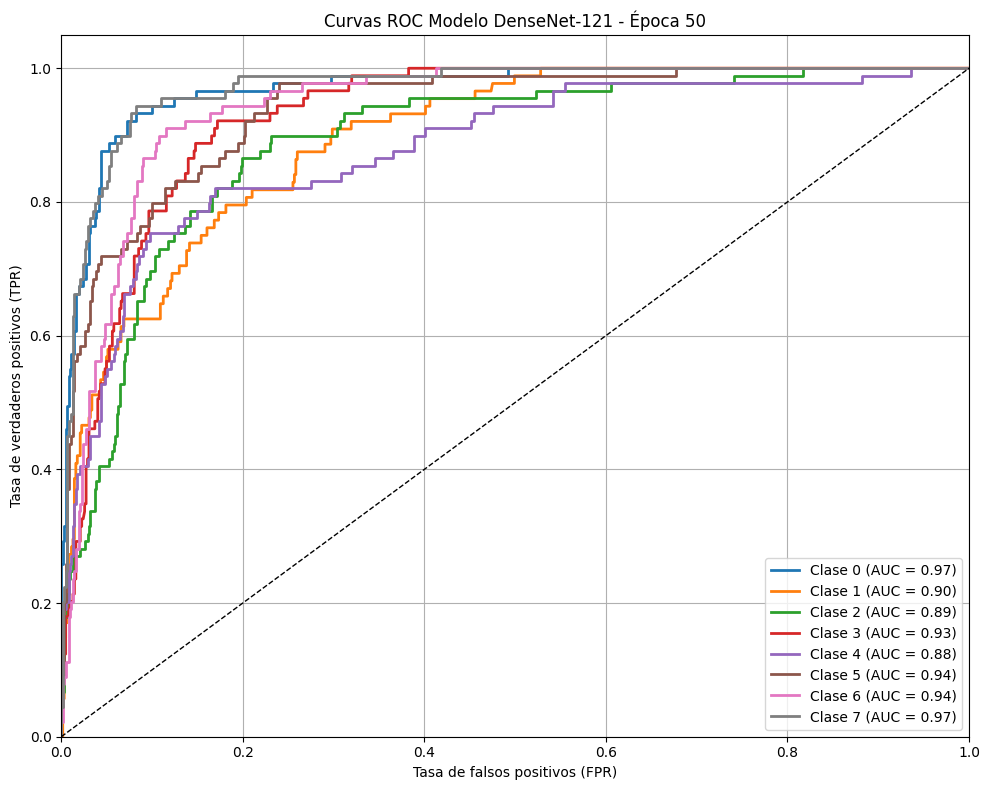

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_2a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_2a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


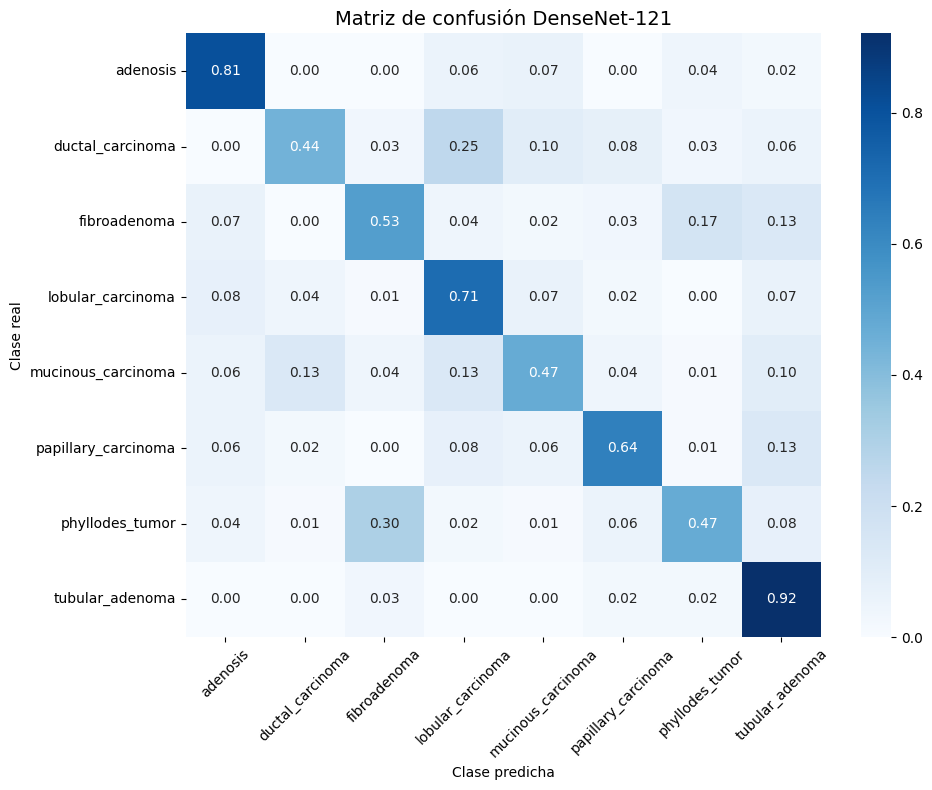

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_2a, pred_labels_densenet_2a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 2b: Dataloader, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [5]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
# optimizer = optim.Adam(model.parameters(), lr=1e-4) MAAAL?
# optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 175MB/s]


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0631, Test Loss=1.9640, Test Acc=0.2475


Epoch 2: Train Loss=1.9250, Test Loss=1.8339, Test Acc=0.3629


Epoch 3: Train Loss=1.8237, Test Loss=1.7233, Test Acc=0.4318


Epoch 4: Train Loss=1.7394, Test Loss=1.6533, Test Acc=0.4655


Epoch 5: Train Loss=1.6685, Test Loss=1.5898, Test Acc=0.4937


Epoch 6: Train Loss=1.6163, Test Loss=1.5396, Test Acc=0.5120


Epoch 7: Train Loss=1.5608, Test Loss=1.5000, Test Acc=0.4909


Epoch 8: Train Loss=1.5163, Test Loss=1.4503, Test Acc=0.5345


Epoch 9: Train Loss=1.4700, Test Loss=1.4157, Test Acc=0.5359


Epoch 10: Train Loss=1.4360, Test Loss=1.3837, Test Acc=0.5302


Epoch 11: Train Loss=1.4122, Test Loss=1.3518, Test Acc=0.5556


Epoch 12: Train Loss=1.3922, Test Loss=1.3491, Test Acc=0.5387


Epoch 13: Train Loss=1.3728, Test Loss=1.3356, Test Acc=0.5204


Epoch 14: Train Loss=1.3456, Test Loss=1.2867, Test Acc=0.5541


Epoch 15: Train Loss=1.3249, Test Loss=1.2812, Test Acc=0.5654


Epoch 16: Train Loss=1.3093, Test Loss=1.2558, Test Acc=0.5752


Epoch 17: Train Loss=1.2893, Test Loss=1.2365, Test Acc=0.5682


Epoch 18: Train Loss=1.2660, Test Loss=1.2315, Test Acc=0.5752


Epoch 19: Train Loss=1.2543, Test Loss=1.2174, Test Acc=0.5654


Epoch 20: Train Loss=1.2469, Test Loss=1.1926, Test Acc=0.5795


Epoch 21: Train Loss=1.2149, Test Loss=1.1988, Test Acc=0.5682


Epoch 22: Train Loss=1.2107, Test Loss=1.1841, Test Acc=0.5893


Epoch 23: Train Loss=1.1912, Test Loss=1.1694, Test Acc=0.5921


Epoch 24: Train Loss=1.1893, Test Loss=1.1684, Test Acc=0.5907


Epoch 25: Train Loss=1.1927, Test Loss=1.1496, Test Acc=0.5865


Epoch 26: Train Loss=1.1630, Test Loss=1.1620, Test Acc=0.5935


Epoch 27: Train Loss=1.1484, Test Loss=1.1362, Test Acc=0.5992


Epoch 28: Train Loss=1.1528, Test Loss=1.1247, Test Acc=0.6006


Epoch 29: Train Loss=1.1458, Test Loss=1.1238, Test Acc=0.5879


Epoch 30: Train Loss=1.1203, Test Loss=1.1114, Test Acc=0.5921


Epoch 31: Train Loss=1.1240, Test Loss=1.1095, Test Acc=0.6090


Epoch 32: Train Loss=1.1160, Test Loss=1.0938, Test Acc=0.6062


Epoch 33: Train Loss=1.1068, Test Loss=1.0892, Test Acc=0.6146


Epoch 34: Train Loss=1.1032, Test Loss=1.0874, Test Acc=0.6090


Epoch 35: Train Loss=1.0983, Test Loss=1.0910, Test Acc=0.6062


Epoch 36: Train Loss=1.0714, Test Loss=1.0756, Test Acc=0.6104


Epoch 37: Train Loss=1.0681, Test Loss=1.0837, Test Acc=0.6076


Epoch 38: Train Loss=1.0806, Test Loss=1.0741, Test Acc=0.6048


Epoch 39: Train Loss=1.0567, Test Loss=1.0847, Test Acc=0.6034


Epoch 40: Train Loss=1.0569, Test Loss=1.0716, Test Acc=0.6217


Epoch 41: Train Loss=1.0610, Test Loss=1.0663, Test Acc=0.5935


Epoch 42: Train Loss=1.0478, Test Loss=1.0572, Test Acc=0.6160


Epoch 43: Train Loss=1.0588, Test Loss=1.0531, Test Acc=0.6020


Epoch 44: Train Loss=1.0335, Test Loss=1.0344, Test Acc=0.6371


Epoch 45: Train Loss=1.0144, Test Loss=1.0413, Test Acc=0.6231


Epoch 46: Train Loss=1.0050, Test Loss=1.0433, Test Acc=0.6217


Epoch 47: Train Loss=1.0263, Test Loss=1.0498, Test Acc=0.6259
🛑 Early stopping en epoch 47


<All keys matched successfully>

In [6]:
# Prueba 2
true_labels_densenet_2b = true_labels_list
pred_labels_densenet_2b = pred_labels_list
prob_densenet_2b = prob_list

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_2b = accuracy_score(true_labels_densenet_2b, pred_labels_densenet_2b)
error_rate_densenet_2b = 1 - acc_densenet_2b
print(f"Accuracy total: {acc_densenet_2b:.4f}, Error rate: {error_rate_densenet_2b:.4f}\n")

print(classification_report(
    true_labels_densenet_2b,
    pred_labels_densenet_2b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6259, Error rate: 0.3741

                     precision    recall  f1-score   support

           adenosis       0.86      0.79      0.82        89
   ductal_carcinoma       0.48      0.44      0.46        88
       fibroadenoma       0.52      0.65      0.58        89
  lobular_carcinoma       0.71      0.60      0.65        89
 mucinous_carcinoma       0.55      0.55      0.55        89
papillary_carcinoma       0.61      0.57      0.59        89
    phyllodes_tumor       0.71      0.66      0.69        89
    tubular_adenoma       0.62      0.74      0.67        89

           accuracy                           0.63       711
          macro avg       0.63      0.63      0.63       711
       weighted avg       0.63      0.63      0.63       711



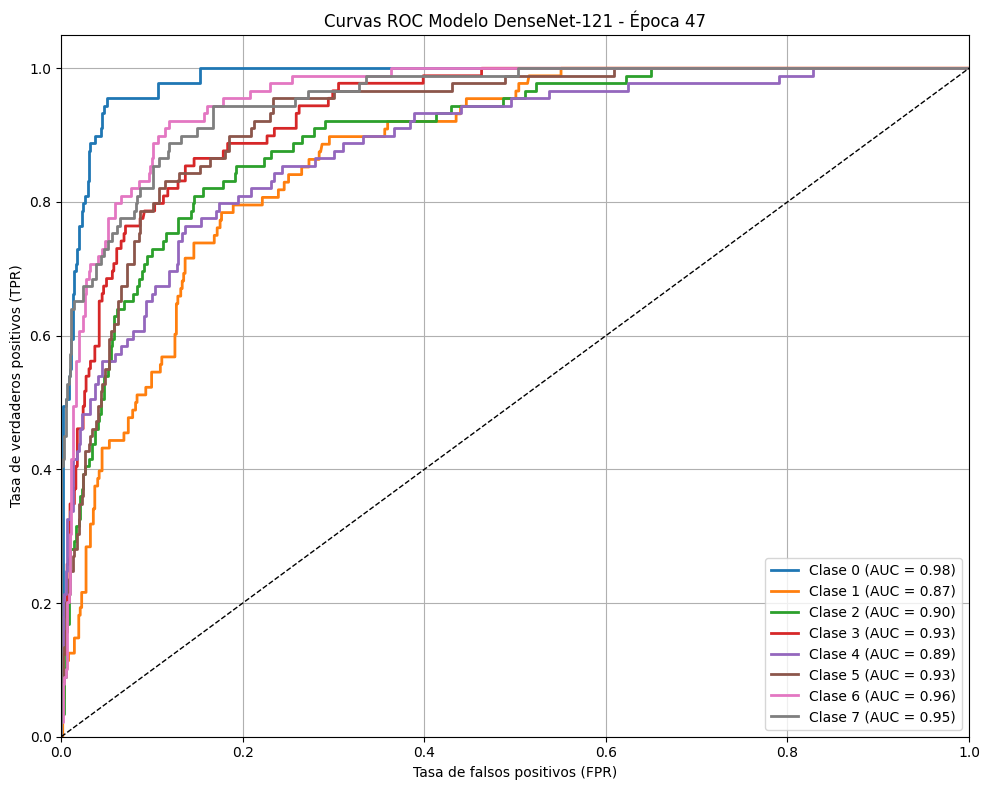

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_2b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_2b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


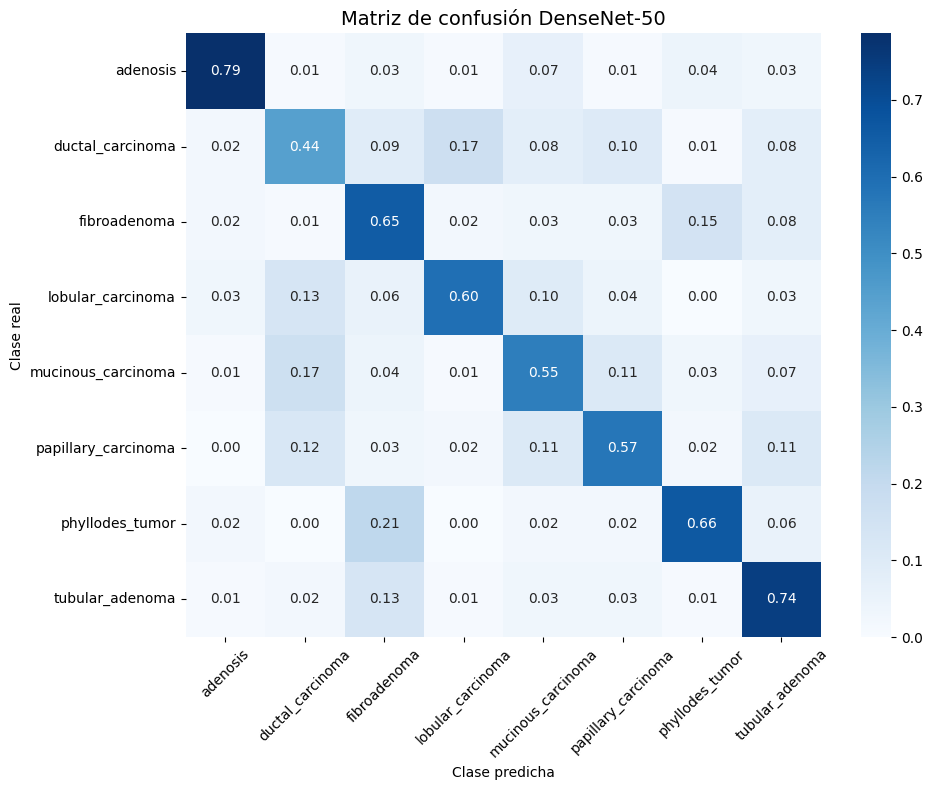

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_2b, pred_labels_densenet_2b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-50", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 3a: batch-loading, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle


# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.4209, Test Loss=0.7992, Test Acc=0.7468


Epoch 2: Train Loss=0.7694, Test Loss=0.5718, Test Acc=0.7876


Epoch 3: Train Loss=0.5136, Test Loss=0.3851, Test Acc=0.8664


Epoch 4: Train Loss=0.3940, Test Loss=0.3823, Test Acc=0.8594


Epoch 5: Train Loss=0.3137, Test Loss=0.3049, Test Acc=0.8889


Epoch 6: Train Loss=0.2378, Test Loss=0.3476, Test Acc=0.8833


Epoch 7: Train Loss=0.2036, Test Loss=0.2665, Test Acc=0.9142


Epoch 8: Train Loss=0.1630, Test Loss=0.2730, Test Acc=0.9015


Epoch 9: Train Loss=0.1488, Test Loss=0.3478, Test Acc=0.8917


Epoch 10: Train Loss=0.1138, Test Loss=0.2757, Test Acc=0.9030
🛑 Early stopping en epoch 10


<All keys matched successfully>

In [ ]:
# Prueba 3
true_labels_densenet_3a = true_labels_list
pred_labels_densenet_3a = pred_labels_list
prob_densenet_3a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_3a = accuracy_score(true_labels_densenet_3a, pred_labels_densenet_3a)
error_rate_densenet_3a = 1 - acc_densenet_3a
print(f"Accuracy total: {acc_densenet_3a:.4f}, Error rate: {error_rate_densenet_3a:.4f}\n")

print(classification_report(
    true_labels_densenet_3a,
    pred_labels_densenet_3a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.9030, Error rate: 0.0970

                     precision    recall  f1-score   support

           adenosis       0.97      0.98      0.97        89
   ductal_carcinoma       0.85      0.91      0.88        88
       fibroadenoma       0.79      0.85      0.82        89
  lobular_carcinoma       0.91      0.93      0.92        89
 mucinous_carcinoma       0.90      0.96      0.93        89
papillary_carcinoma       0.94      0.85      0.89        89
    phyllodes_tumor       0.92      0.82      0.87        89
    tubular_adenoma       0.95      0.92      0.94        89

           accuracy                           0.90       711
          macro avg       0.91      0.90      0.90       711
       weighted avg       0.91      0.90      0.90       711



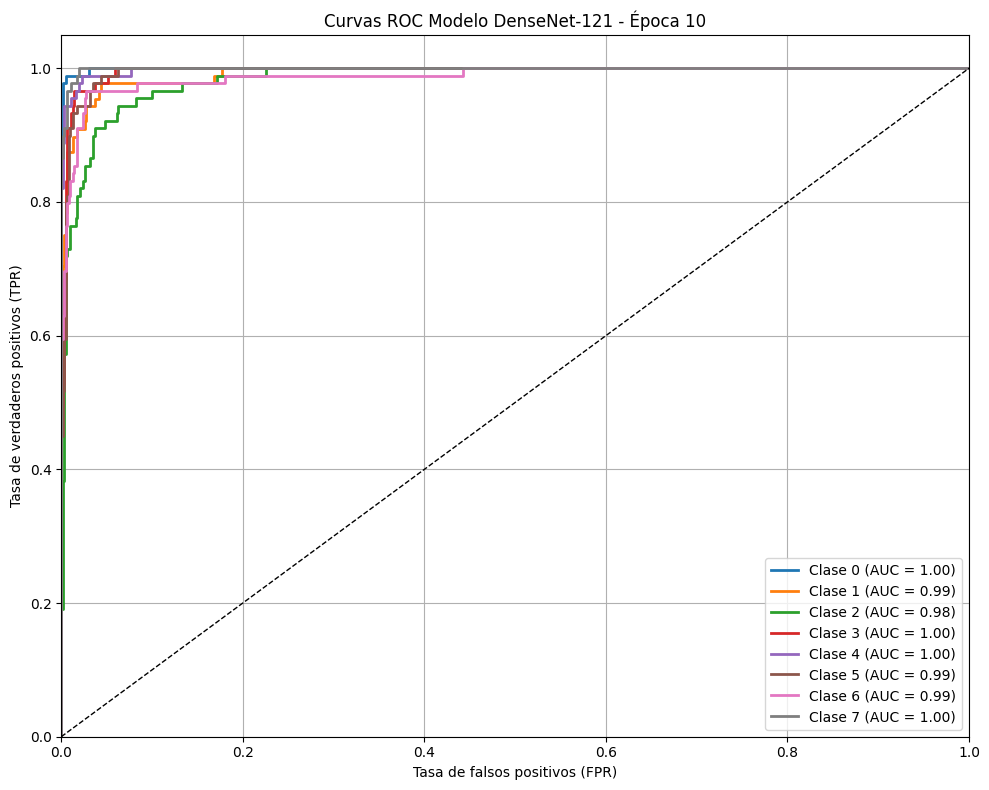

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_3a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_3a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


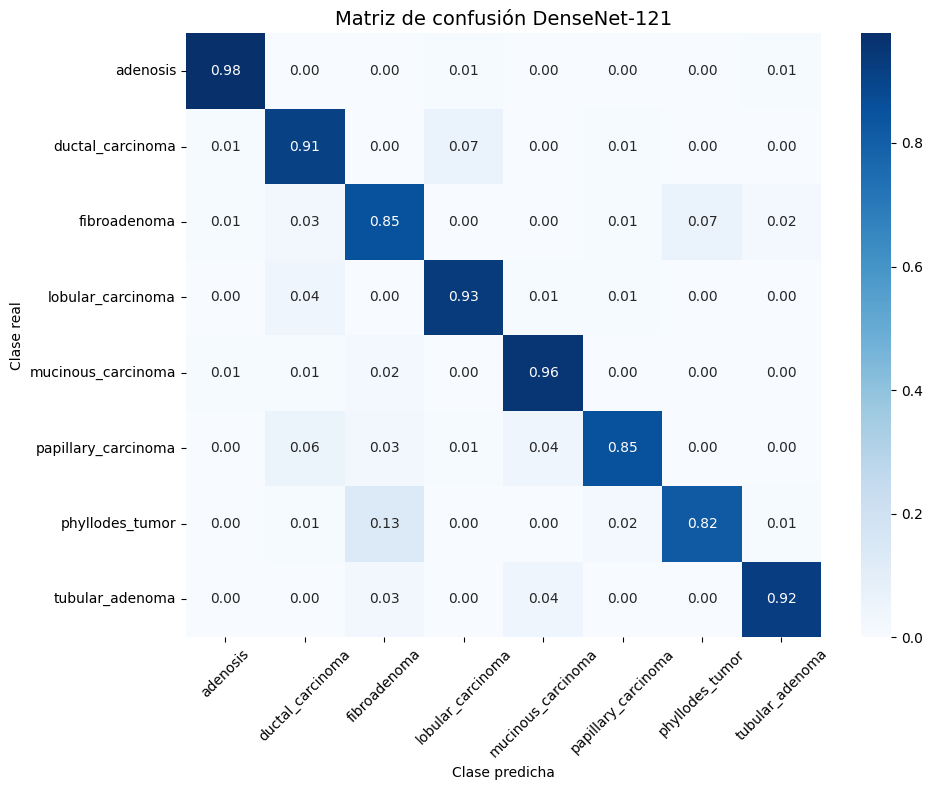

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_3a, pred_labels_densenet_3a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 3b: batch-loading, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle


# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.1000, Test Loss=2.0784, Test Acc=0.1800


Epoch 2: Train Loss=1.9785, Test Loss=1.9616, Test Acc=0.2954


Epoch 3: Train Loss=1.8877, Test Loss=1.8650, Test Acc=0.3460


Epoch 4: Train Loss=1.8211, Test Loss=1.7771, Test Acc=0.4121


Epoch 5: Train Loss=1.7605, Test Loss=1.7146, Test Acc=0.4599


Epoch 6: Train Loss=1.6955, Test Loss=1.6484, Test Acc=0.4923


Epoch 7: Train Loss=1.6484, Test Loss=1.6003, Test Acc=0.5120


Epoch 8: Train Loss=1.6034, Test Loss=1.5497, Test Acc=0.5401


Epoch 9: Train Loss=1.5676, Test Loss=1.5185, Test Acc=0.5387


Epoch 10: Train Loss=1.5371, Test Loss=1.4614, Test Acc=0.5992


Epoch 11: Train Loss=1.4987, Test Loss=1.4301, Test Acc=0.5682


Epoch 12: Train Loss=1.4694, Test Loss=1.4010, Test Acc=0.5949


Epoch 13: Train Loss=1.4461, Test Loss=1.3748, Test Acc=0.6188


Epoch 14: Train Loss=1.4232, Test Loss=1.3608, Test Acc=0.5921


Epoch 15: Train Loss=1.3966, Test Loss=1.3268, Test Acc=0.6287


Epoch 16: Train Loss=1.3849, Test Loss=1.3061, Test Acc=0.6259


Epoch 17: Train Loss=1.3640, Test Loss=1.2854, Test Acc=0.6301


Epoch 18: Train Loss=1.3516, Test Loss=1.2808, Test Acc=0.6217


Epoch 19: Train Loss=1.3335, Test Loss=1.2743, Test Acc=0.6217


Epoch 20: Train Loss=1.3067, Test Loss=1.2469, Test Acc=0.6371


Epoch 21: Train Loss=1.3106, Test Loss=1.2272, Test Acc=0.6399


Epoch 22: Train Loss=1.2871, Test Loss=1.2260, Test Acc=0.6399


Epoch 23: Train Loss=1.2856, Test Loss=1.1916, Test Acc=0.6470


Epoch 24: Train Loss=1.2766, Test Loss=1.1891, Test Acc=0.6428


Epoch 25: Train Loss=1.2422, Test Loss=1.1755, Test Acc=0.6484


Epoch 26: Train Loss=1.2298, Test Loss=1.1792, Test Acc=0.6371


Epoch 27: Train Loss=1.2420, Test Loss=1.1581, Test Acc=0.6357


Epoch 28: Train Loss=1.2169, Test Loss=1.1553, Test Acc=0.6456


Epoch 29: Train Loss=1.2123, Test Loss=1.1443, Test Acc=0.6442


Epoch 30: Train Loss=1.1915, Test Loss=1.1312, Test Acc=0.6540


Epoch 31: Train Loss=1.2011, Test Loss=1.1305, Test Acc=0.6456


Epoch 32: Train Loss=1.1811, Test Loss=1.1153, Test Acc=0.6540


Epoch 33: Train Loss=1.1727, Test Loss=1.1111, Test Acc=0.6399


Epoch 34: Train Loss=1.1524, Test Loss=1.1109, Test Acc=0.6526


Epoch 35: Train Loss=1.1584, Test Loss=1.0982, Test Acc=0.6610


Epoch 36: Train Loss=1.1395, Test Loss=1.0857, Test Acc=0.6582


Epoch 37: Train Loss=1.1450, Test Loss=1.0935, Test Acc=0.6554


Epoch 38: Train Loss=1.1405, Test Loss=1.0716, Test Acc=0.6596


Epoch 39: Train Loss=1.1309, Test Loss=1.0717, Test Acc=0.6554


Epoch 40: Train Loss=1.1258, Test Loss=1.0728, Test Acc=0.6498


Epoch 41: Train Loss=1.1207, Test Loss=1.0591, Test Acc=0.6695


Epoch 42: Train Loss=1.1187, Test Loss=1.0468, Test Acc=0.6596


Epoch 43: Train Loss=1.1129, Test Loss=1.0377, Test Acc=0.6709


Epoch 44: Train Loss=1.1069, Test Loss=1.0406, Test Acc=0.6554


Epoch 45: Train Loss=1.0898, Test Loss=1.0429, Test Acc=0.6723


Epoch 46: Train Loss=1.0959, Test Loss=1.0421, Test Acc=0.6653
🛑 Early stopping en epoch 46


<All keys matched successfully>

In [ ]:
# Prueba 3
true_labels_densenet_3b = true_labels_list
pred_labels_densenet_3b = pred_labels_list
prob_densenet_3b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_3b = accuracy_score(true_labels_densenet_3b, pred_labels_densenet_3b)
error_rate_densenet_3b = 1 - acc_densenet_3b
print(f"Accuracy total: {acc_densenet_3b:.4f}, Error rate: {error_rate_densenet_3b:.4f}\n")

print(classification_report(
    true_labels_densenet_3b,
    pred_labels_densenet_3b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6653, Error rate: 0.3347

                     precision    recall  f1-score   support

           adenosis       0.78      0.85      0.82        89
   ductal_carcinoma       0.67      0.55      0.60        88
       fibroadenoma       0.65      0.55      0.60        89
  lobular_carcinoma       0.76      0.70      0.73        89
 mucinous_carcinoma       0.59      0.61      0.60        89
papillary_carcinoma       0.72      0.46      0.56        89
    phyllodes_tumor       0.74      0.70      0.72        89
    tubular_adenoma       0.53      0.91      0.67        89

           accuracy                           0.67       711
          macro avg       0.68      0.67      0.66       711
       weighted avg       0.68      0.67      0.66       711



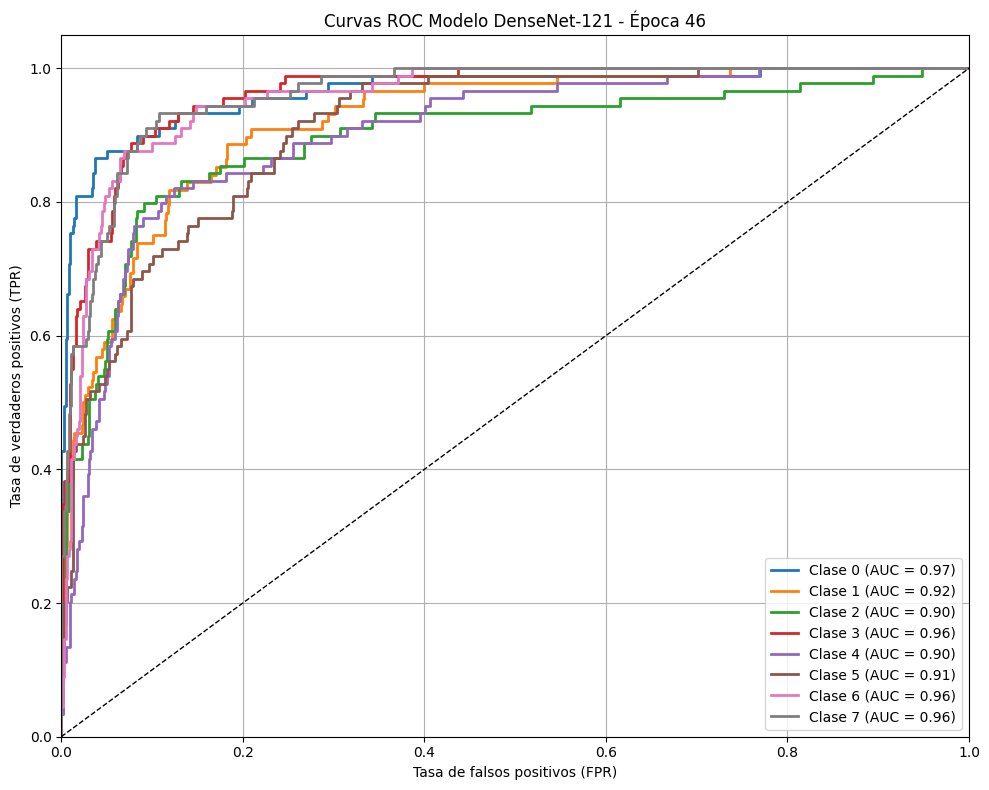

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_3b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_3b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


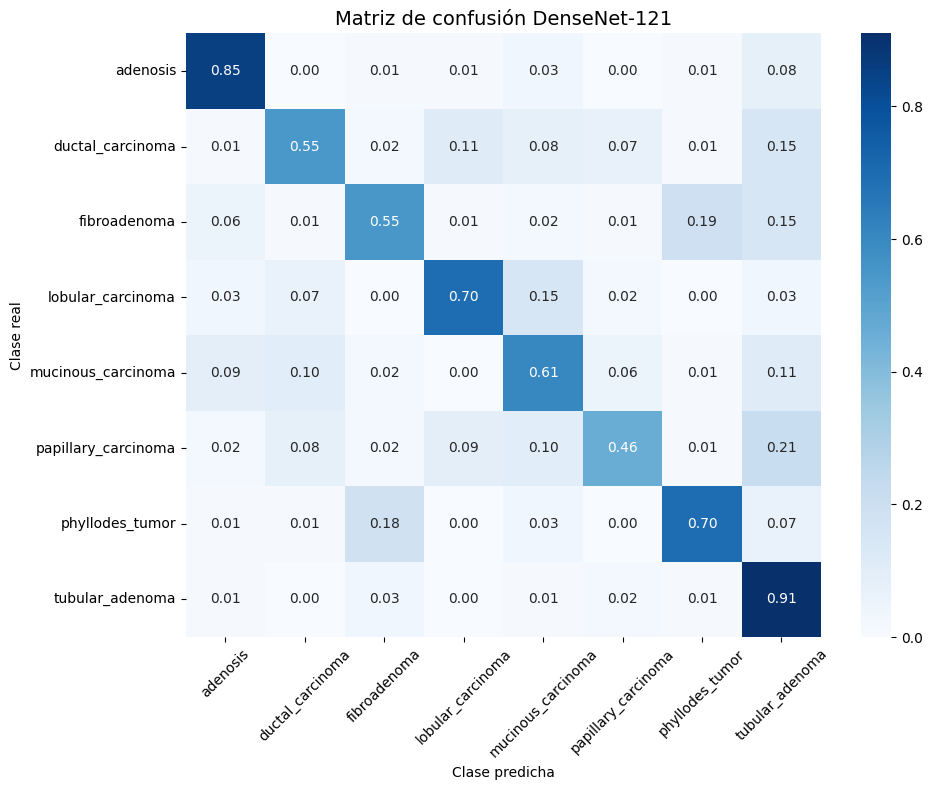

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_3b, pred_labels_densenet_3b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4a: batch-loading, CON DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle


# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=2.0488, Test Loss=1.9713, Test Acc=0.2672


Epoch 2: Train Loss=1.9217, Test Loss=1.8454, Test Acc=0.3643


Epoch 3: Train Loss=1.8188, Test Loss=1.7510, Test Acc=0.4121


Epoch 4: Train Loss=1.7427, Test Loss=1.6714, Test Acc=0.4374


Epoch 5: Train Loss=1.6752, Test Loss=1.5965, Test Acc=0.4880


Epoch 6: Train Loss=1.6156, Test Loss=1.5570, Test Acc=0.4880


Epoch 7: Train Loss=1.5804, Test Loss=1.4980, Test Acc=0.4993


Epoch 8: Train Loss=1.5438, Test Loss=1.4562, Test Acc=0.5260


Epoch 9: Train Loss=1.4928, Test Loss=1.4181, Test Acc=0.5260


Epoch 10: Train Loss=1.4763, Test Loss=1.3987, Test Acc=0.5415


Epoch 11: Train Loss=1.4398, Test Loss=1.3819, Test Acc=0.5274


Epoch 12: Train Loss=1.4165, Test Loss=1.3370, Test Acc=0.5584


Epoch 13: Train Loss=1.3905, Test Loss=1.3125, Test Acc=0.5541


Epoch 14: Train Loss=1.3760, Test Loss=1.2952, Test Acc=0.5626


Epoch 15: Train Loss=1.3449, Test Loss=1.2783, Test Acc=0.5598


Epoch 16: Train Loss=1.3265, Test Loss=1.2735, Test Acc=0.5570


Epoch 17: Train Loss=1.3326, Test Loss=1.2410, Test Acc=0.5752


Epoch 18: Train Loss=1.2926, Test Loss=1.2292, Test Acc=0.5851


Epoch 19: Train Loss=1.2968, Test Loss=1.2128, Test Acc=0.5949


Epoch 20: Train Loss=1.2851, Test Loss=1.2024, Test Acc=0.5795


Epoch 21: Train Loss=1.2627, Test Loss=1.1899, Test Acc=0.5893


Epoch 22: Train Loss=1.2727, Test Loss=1.1850, Test Acc=0.5921


Epoch 23: Train Loss=1.2387, Test Loss=1.1738, Test Acc=0.5879


Epoch 24: Train Loss=1.2376, Test Loss=1.1552, Test Acc=0.5935


Epoch 25: Train Loss=1.2173, Test Loss=1.1666, Test Acc=0.6034


Epoch 26: Train Loss=1.2186, Test Loss=1.1333, Test Acc=0.5809


Epoch 27: Train Loss=1.2143, Test Loss=1.1240, Test Acc=0.5949


Epoch 28: Train Loss=1.1937, Test Loss=1.1184, Test Acc=0.6146


Epoch 29: Train Loss=1.1977, Test Loss=1.1031, Test Acc=0.6104


Epoch 30: Train Loss=1.1819, Test Loss=1.1019, Test Acc=0.5977


Epoch 31: Train Loss=1.1835, Test Loss=1.0962, Test Acc=0.6062


Epoch 32: Train Loss=1.1671, Test Loss=1.0989, Test Acc=0.6062


Epoch 33: Train Loss=1.1602, Test Loss=1.0886, Test Acc=0.6006


Epoch 34: Train Loss=1.1544, Test Loss=1.0783, Test Acc=0.6034


Epoch 35: Train Loss=1.1627, Test Loss=1.0659, Test Acc=0.6174


Epoch 36: Train Loss=1.1296, Test Loss=1.0764, Test Acc=0.6034


Epoch 37: Train Loss=1.1233, Test Loss=1.0445, Test Acc=0.6203


Epoch 38: Train Loss=1.1389, Test Loss=1.0607, Test Acc=0.6118


Epoch 39: Train Loss=1.1238, Test Loss=1.0602, Test Acc=0.6287


Epoch 40: Train Loss=1.1298, Test Loss=1.0464, Test Acc=0.6104
🛑 Early stopping en epoch 40


<All keys matched successfully>

In [ ]:
# Prueba 4
true_labels_densenet_4a = true_labels_list
pred_labels_densenet_4a = pred_labels_list
prob_densenet_4a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_4a = accuracy_score(true_labels_densenet_4a, pred_labels_densenet_4a)
error_rate_densenet_4a = 1 - acc_densenet_4a
print(f"Accuracy total: {acc_densenet_4a:.4f}, Error rate: {error_rate_densenet_4a:.4f}\n")

print(classification_report(
    true_labels_densenet_4a,
    pred_labels_densenet_4a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6104, Error rate: 0.3896

                     precision    recall  f1-score   support

           adenosis       0.76      0.81      0.78        89
   ductal_carcinoma       0.52      0.49      0.50        88
       fibroadenoma       0.56      0.46      0.51        89
  lobular_carcinoma       0.55      0.56      0.56        89
 mucinous_carcinoma       0.52      0.52      0.52        89
papillary_carcinoma       0.74      0.63      0.68        89
    phyllodes_tumor       0.63      0.49      0.55        89
    tubular_adenoma       0.61      0.92      0.74        89

           accuracy                           0.61       711
          macro avg       0.61      0.61      0.60       711
       weighted avg       0.61      0.61      0.60       711



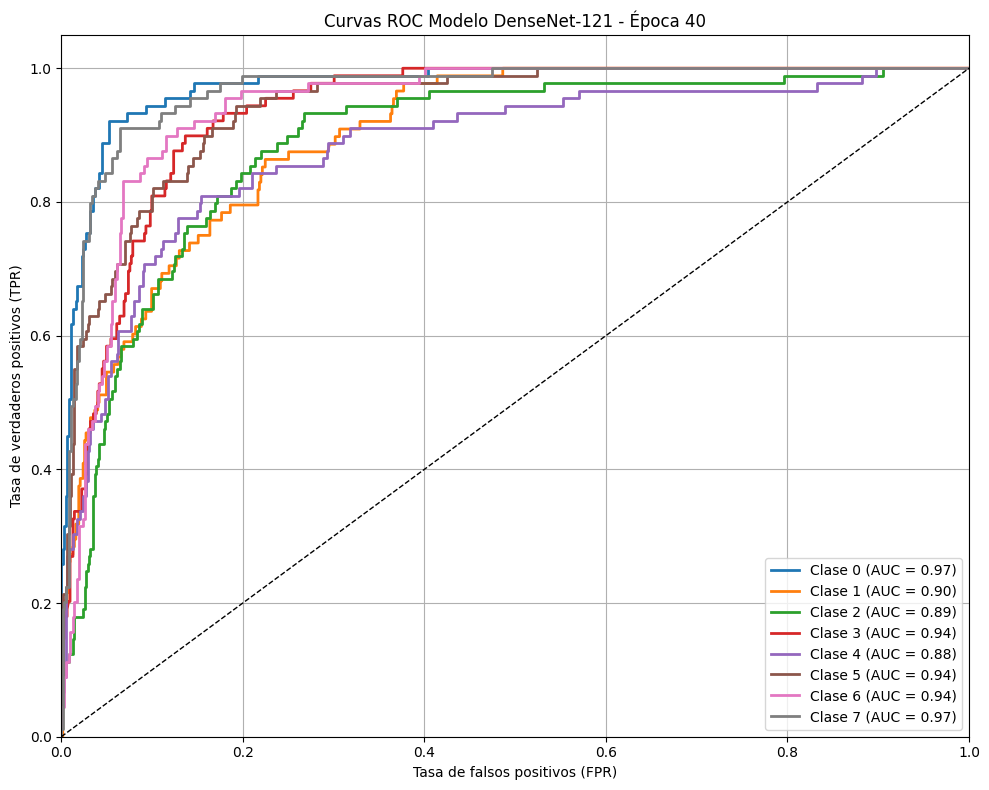

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_4a, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_4a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


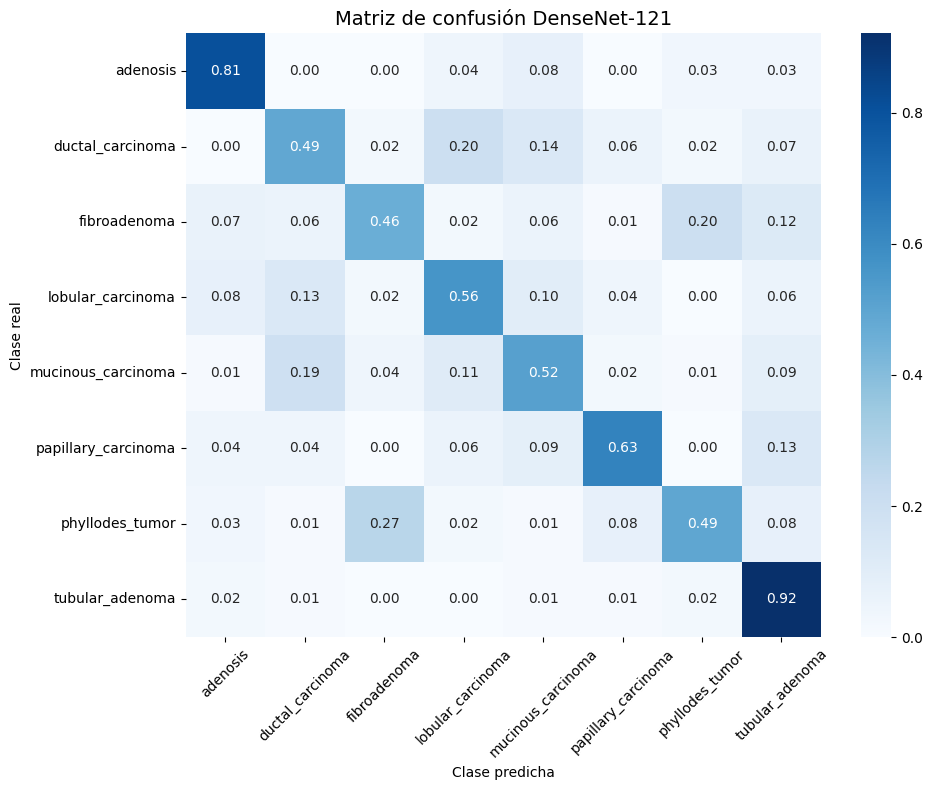

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_4a, pred_labels_densenet_4a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4b: batch-loading, CON DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
from random import shuffle


# =================================
# Modelo DenseNet121 preentrenado
# =================================
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = train_transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = test_transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Linear(in_features=1024, out_features=8, bias=True)


Epoch 1: Train Loss=1.3744, Test Loss=0.8083, Test Acc=0.7117


Epoch 2: Train Loss=0.8000, Test Loss=0.5928, Test Acc=0.7848


Epoch 3: Train Loss=0.5912, Test Loss=0.4585, Test Acc=0.8228


Epoch 4: Train Loss=0.4862, Test Loss=0.4336, Test Acc=0.8509


Epoch 5: Train Loss=0.4060, Test Loss=0.3307, Test Acc=0.8861


Epoch 6: Train Loss=0.3173, Test Loss=0.3366, Test Acc=0.8692


Epoch 7: Train Loss=0.2823, Test Loss=0.3289, Test Acc=0.8847


Epoch 8: Train Loss=0.2356, Test Loss=0.3324, Test Acc=0.8861


Epoch 9: Train Loss=0.2098, Test Loss=0.3261, Test Acc=0.8931


Epoch 10: Train Loss=0.1903, Test Loss=0.3021, Test Acc=0.9015


Epoch 11: Train Loss=0.1957, Test Loss=0.2642, Test Acc=0.9030


Epoch 12: Train Loss=0.1481, Test Loss=0.3473, Test Acc=0.8889


Epoch 13: Train Loss=0.1436, Test Loss=0.3061, Test Acc=0.9142


Epoch 14: Train Loss=0.1227, Test Loss=0.3044, Test Acc=0.9100
🛑 Early stopping en epoch 14


<All keys matched successfully>

In [ ]:
# Prueba 4
true_labels_densenet_4b = true_labels_list
pred_labels_densenet_4b = pred_labels_list
prob_densenet_4b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_densenet_4b = accuracy_score(true_labels_densenet_4b, pred_labels_densenet_4b)
error_rate_densenet_4b = 1 - acc_densenet_4b
print(f"Accuracy total: {acc_densenet_4b:.4f}, Error rate: {error_rate_densenet_4b:.4f}\n")

print(classification_report(
    true_labels_densenet_4b,
    pred_labels_densenet_4b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.9100, Error rate: 0.0900

                     precision    recall  f1-score   support

           adenosis       0.99      0.96      0.97        89
   ductal_carcinoma       0.97      0.67      0.79        88
       fibroadenoma       0.84      0.96      0.89        89
  lobular_carcinoma       0.81      0.96      0.88        89
 mucinous_carcinoma       0.94      0.89      0.91        89
papillary_carcinoma       0.89      0.96      0.92        89
    phyllodes_tumor       0.93      0.96      0.94        89
    tubular_adenoma       0.95      0.94      0.95        89

           accuracy                           0.91       711
          macro avg       0.92      0.91      0.91       711
       weighted avg       0.92      0.91      0.91       711



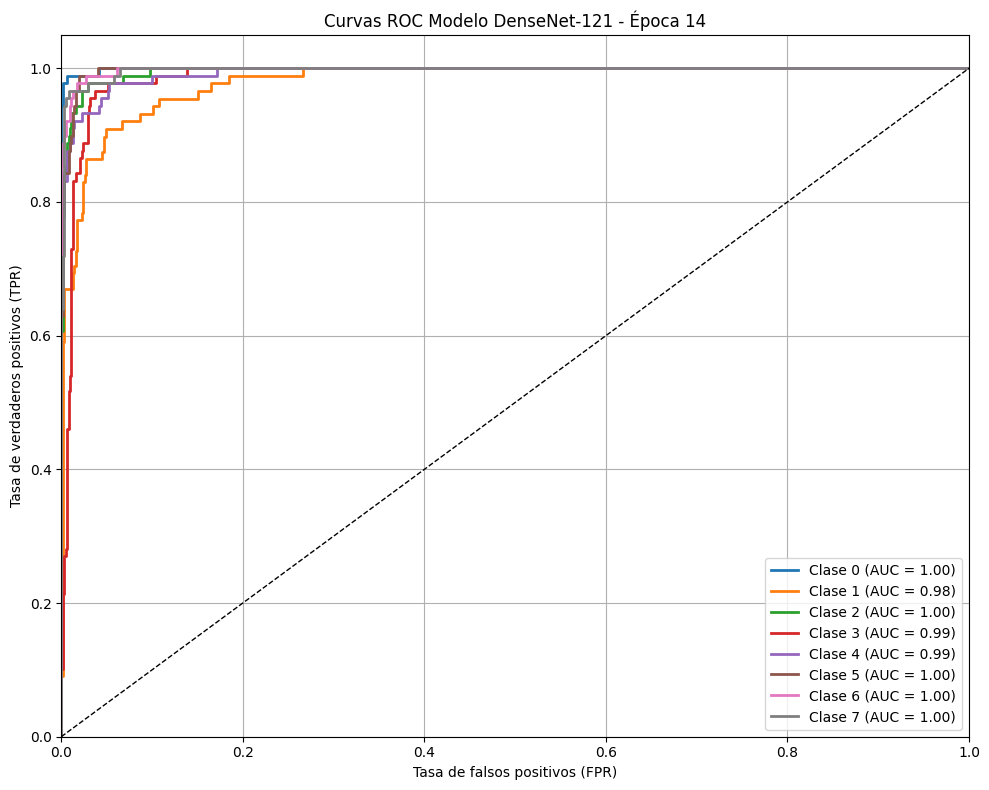

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_densenet_4b, classes=list(range(num_classes)))
y_score = np.array(prob_densenet_4b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet-121 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


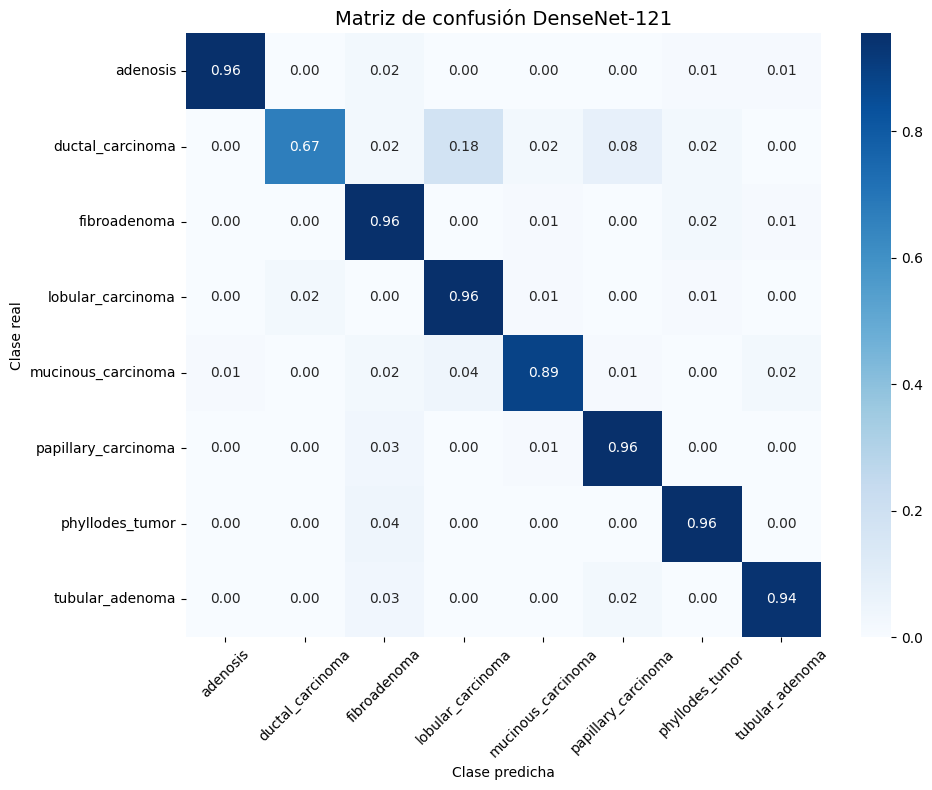

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_densenet_4b, pred_labels_densenet_4b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión DenseNet-121", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

